In [1]:
import pandas as pd 

from porise.model.algorithms.cmab import HybridLinUCB
from porise.envs.real.real_env import RealEnv
from porise import Simulator

In [2]:
df = pd.read_csv('../porise/data/exp5217_all_imp100_scaled_train_new.csv')
print("cdna user features loaded")
df = df.set_index('easy_id')
user_map = df.T.to_dict('list')
print('get user map ready')

cdna user features loaded
get user map ready


In [3]:
env = RealEnv(rat_log_path='../porise/data/reward_nov02_nov30_exp5217.csv', user_vectors_map=user_map)

In [4]:
print(env.arm_feat_dim, env.user_cdna_dim, env.user_stat_dim)
# print(len(env.get_user_state()[1][0]))
# print(len(env.get_user_state()[0]))

10 143 16


In [5]:
model = HybridLinUCB(n_arms=env.action_space.n,
              alpha=2,
#               arm_feat_dim=len(env.get_user_state()[1][0]),
#               user_feat_dim=len(env.get_user_state()[0]),
              arm_feat_dim=env.arm_feat_dim,
              user_feat_dim=(env.user_cdna_dim+env.user_stat_dim),
              return_list=False)

### Train with past N records, every time a new record comes.

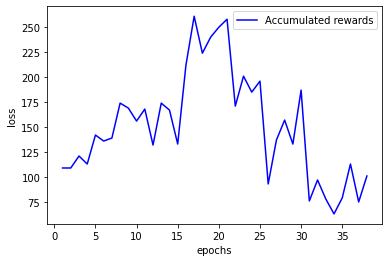

384600it [32:54, 194.81it/s, total reward=5779.0]                            


In [6]:
simulator = Simulator(model=model,
                     env=env,
                     train_every=int(128),
                     throttle=int(1e2),
                     memory_capacity=int(128),
                     plot_every=int(1e4))
simulator.reset()
simulator.run()

### 1. N=128, Memory=128. Every record trained only once. 

### 2. N=128, Memory=1024, each time, records in the memory is trained.

In [7]:
# simulator = Simulator(model=model,
#                      env=env,
#                      train_every=int(128),
#                      throttle=int(1e2),
#                      memory_capacity=int(1024),
#                      plot_every=int(1e4))
# simulator.run()

### Performance is improved by 6%